# Итераторы

__Итератор__ (как шаблон проектрирования) — это поведенческий паттерн проектирования, который даёт возможность последовательно обходить элементы составных объектов, не раскрывая их внутреннего представления. (https://refactoring.guru/ru/design-patterns/iterator)

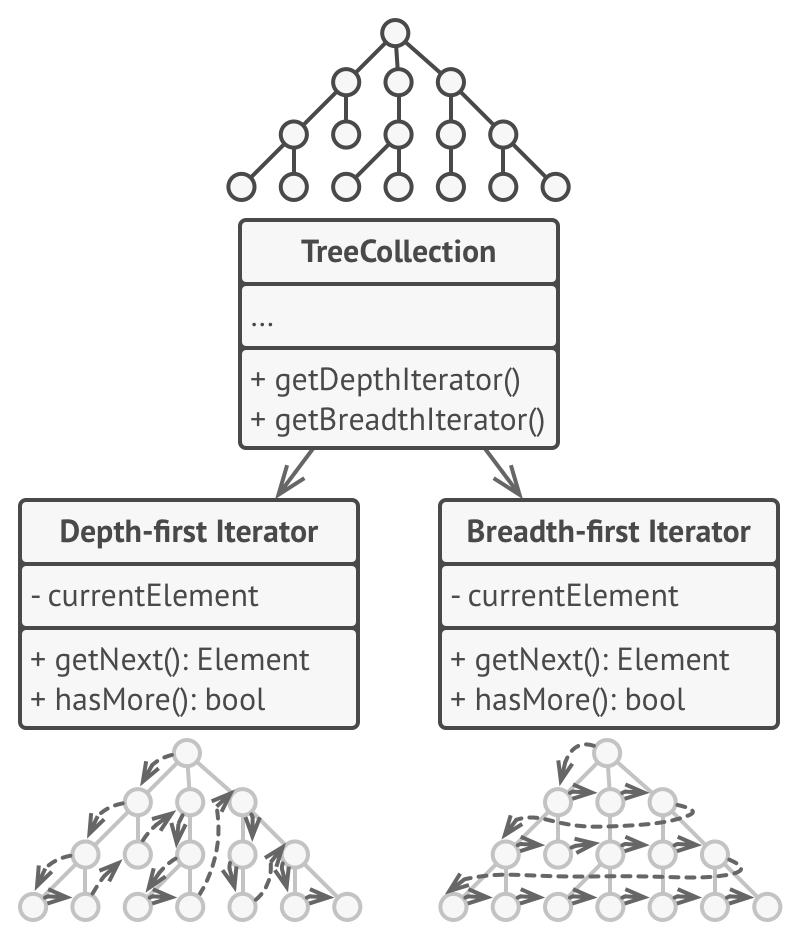

## В Python

https://habr.com/ru/post/337314/

https://younglinux.info/python/feature/iterator

https://devpractice.ru/python-lesson-15-iterators-and-generators/

__Итерируемый объект__ — это любой объект, от которого встроенная функция iter() может получить итератор.


Функция `iter()` для получения элементов из объекта, по которому происходит итерирование. Например, эту функцию неявно вызывает оператор `for`. Функция пытается вызвать у объекта:

- метод `__iter__()`
- если метода `__iter__()` у объекта нет, пытается вызвать метод `__getitem__(key)`

Эти методы должны возвращать итератор.

__Итератор__ в python — это любой объект, реализующий метод `__next__` без аргументов, который должен вернуть следующий элемент или ошибку StopIteration. Также он реализует метод `__iter__` и поэтому сам является итерируемым объектом.

Итератор должен обладать следующими методами:

- `__next__` - возвращает следующий доступный элемент и вызывает исключение `StopIteration`, когда элементов не осталось.
- `__iter__` - возвращает `self`. Это позволяет использовать итератор там, где ожидается итерируемых объект, например в `for`.
- `__subclasshook__` - проверяет наличие у класса метода `__iter__` и `__next__`

Рассмотрим пример:

In [ ]:
# Список - это итерируемый объект
cities = ["Berlin", "Vienna", "Zurich"]

# Получаем итератор
iterator_obj = iter(cities)

# В итераторе реализован метод __next__
print(next(iterator_obj))
print(next(iterator_obj))
print(next(iterator_obj))
next(iterator_obj)

### Использование итератора

Допустим, у нас есть класс, который хранит в себе список объектов, и нам по логике программы удобно было бы итерироваться сразу по этому списку. Можем сделать такой класс итерируемым объектом.

In [ ]:
class ListOfSth:
    def __init__(self):
        self._lst = []
        
    def add(self, obj):
        self._lst.append(obj)
        
    def __iter__(self):
        return iter(self._lst)
    
our_list = ListOfSth()
our_list.add(1)
our_list.add("two")
our_list.add([3, 4, 5])

for item in our_list:
    print(item)

Другой вариант - создать непосредственно итератор.

In [ ]:
class SimpleIterator:
    def __iter__(self):
        return self

    def __init__(self, limit):
        self.limit = limit
        self.counter = 0

    def __next__(self):
        if self.counter < self.limit:
            self.counter += 1
            return 1
        else:
            raise StopIteration

s_iter = SimpleIterator(5)
for i in s_iter:
    print(i)

# Генераторы

__Генератор__ в питоне - это специальный объект, который возвращается генераторной функцией и обладает тем же интерфейсом, что и итератор. Генераторная функция задается либо ключевым словом `yield`, либо генераторным выражением.

In [ ]:
def simple_generator(val):
    while val > 0:
        val -= 1
        yield 1

gen_iter = simple_generator(2)
print(type(simple_generator))
print(type(gen_iter))
print(next(gen_iter))
print(next(gen_iter))
print(next(gen_iter))

Что произошло в предыдущей ячейке:

1. Функция `simple_generator` вернула объект-генератор, который обладает тем же интерфейсом, что и итератор
2. Обращаемся к генератору так же, как и к итератору
3. Когда выполнение функции завершается, возникает исключение StopIteration, которое служит индикатором конца данных

Сравним два варианта получения последовательности Фибоначчи: через итератор и через генератор.

In [ ]:
class FibonacciIterator:
    def __init__(self):
        self.prev = 0
        self.cur = 1

    def __next__(self):
        result = self.prev
        self.prev, self.cur = self.cur, self.prev + self.cur
        return result

    def __iter__(self):
        return self

for i, num in enumerate(FibonacciIterator()):
    print(num)
    if i > 7:
        break

In [ ]:
def fibonacci():
    prev, cur = 0, 1
    while True:
        yield prev
        prev, cur = cur, prev + cur

for i, num in enumerate(fibonacci()):
    print(num)
    if i > 7:
        break

### Оператор yield from

In [ ]:
arr = [1, 2, 3, 4]

def yield_from_gen():
    yield from arr
    
for i in yield_from_gen():
    print(i)

### Метод-генератор

In [ ]:
class Bank():
    crisis = False
    def create_atm(self) :
        while not self.crisis :
            yield "$100"
            
sber = Bank()
atm1 = sber.create_atm()
for i in range(5):
    print(next(atm1))
    
print("Да будет кризис")
sber.crisis = True
next(atm1)

In [ ]:
sber.crisis = False
next(atm1)

In [ ]:
atm2 = sber.create_atm()
for i in range(5):
    print(next(atm2))

## Задание

Допустим, есть произвольное количество функций, которые возвращают некоторые значения. Нужно написать класс, итерируясь по которому, можно получить все эти значения.

# Контекстные менеджеры

https://pavel-karateev.gitbook.io/intermediate-python/sintaksis/context_managers

Иногда при работе с какими-то сущностями нужно корректно обработать их закрытие в любом случае, даже при возникновении исключения. Классический пример - любой открытый файловый дескриптор нужно закрыть, во избежание блокировки ресурса. Для удобства этого в Python 2.5 появились контекстные менеджеры.

In [ ]:
with open("some_file.txt", 'w') as f:
    print(f)

В предыдущем примере функция `open` возвращает объект контекстного менеджера `TextIOWrapper`. Интерфейс контекстного менеджера следующий:

- `__enter__(self)` - метод, который вызывается в начале работы с контекстным менеджером. Должен возвращать сам контекстный менеджер
- `__exit__(self, type, value, traceback)` - метод, в котором описываются действия в конце работы с контекстным менеджером

In [ ]:
class File(object):
    def __init__(self, file_name, method):
        self.file_obj = open(file_name, method, encoding='utf-8')
        
    def __enter__(self):
        return self.file_obj
    
    def __exit__(self, type, value, traceback):
        self.file_obj.close()
        
    def __del__(self):
        print("Сработал деструктор")
        

with File('demo.txt', 'w') as opened_file:
    opened_file.write('Привет!')

Алгоритм работы контекстного менеджера

1. `with` сохраняет метод `__exit__` класса `File`.
2. Следует вызов метода `__enter__` класса `File`.
3. Метод `__enter__` открывает файл и возвращает его.
4. Дескриптор файла передается в `opened_file`.
5. Мы записываем информацию в файл при помощи `.write()`.
6. `with` вызывает сохраненный `__exit__` метод.
7. Метод `__exit__` закрывает файл.
8. Объект контекстного менеджера удаляется.

### Обработка исключений в контекстном менеджере

Иногда в зависимости от типа ошибки, которая произошла при выполнении кода внутри контекстного менеджера, нужно по-разному завершать работу с контекстным менеджером. Для этого как раз существуют параметры `type, value, traceback` метода `__exit__`

In [ ]:
class File(object):
    def __init__(self, file_name, method):
        self.file_obj = open(file_name, method)
        
    def __enter__(self):
        return self.file_obj
    
    def __exit__(self, type, value, traceback):
        print("Исключение было обработано")
        self.file_obj.close()
        return True
    
    def __del__(self):
        print("Сработал деструктор")

    
with File('demo.txt', 'w') as opened_file:
    opened_file.undefined_function()

Алгоритм обработки исключений

1. Тип, значение и обратная трассировка ошибки передается в метод `__exit__`.
2. Обработка исключения передается методу `__exit__`
3. Если `__exit__` возвращает `True`, то исключение было корректно обработано.
4. При возврате любого другого значения `with` вызывает исключение.

## Contextlib

Есть еще более компактный способ создания контекстных менеджеров - через функцию-генератор.

In [ ]:
from contextlib import contextmanager

@contextmanager
def open_file(name):
    # код, который мы бы записали в __enter__
    f = open(name, 'w')
    yield f
    # код, который мы бы записали в __exit__
    f.close()
    

with open_file('demo.txt') as f:
    f.write("contextlib")

## Задание

Написать контекстный менеджер, который по флагу `'r'` считывает данные из файла в интернете в файл, а по флагу `'s'` отправляет их на указанный URL.